# Data Exploration - Missing Data and Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset and randomly sample 10k rows (due to memory limitations)

In [2]:
def loadDataSample(samplesize: int, populationsize: int):
    full = pd.read_csv('vehicles.csv', nrows=populationsize) #take 10k rows due to memory limitations
    sample = full.sample(n=samplesize)
    del(full)
    
    #Remove clearly redundant features
    sample = sample.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url'], axis=1)
    sample.reset_index(drop=True)
    #Unnamed and id columns will have no correlation
    #Url and region url are links to pages that data was scraped from, again obviously no correlation
    #image url, could use computer vision on this but this is outside scope
    
    return sample

def loadDataSet():
    full = pd.read_csv('vehicles.csv')
    
    #Remove clearly redundant features
    full = full.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url'], axis=1)
    #Unnamed and id columns will have no correlation
    #Url and region url are links to pages that data was scraped from, again obviously no correlation
    #image url, could use computer vision on this but this is outside scope
    
    return full

cars = loadDataSample(10000, 120000)

## Stats and visualisation

In [3]:
def visualiseMissing(df, detailed: bool, graphical: bool, rank: bool):
    print("Visualing Missing Data")
    missingInFeature = pd.DataFrame(columns=df.columns)
    for feature in df.columns:
        percentEmpty = df[feature].isna().sum()/len(df[feature])*100
        missingInFeature.at["Percentage Missing", feature] = percentEmpty
    missingInFeature = missingInFeature.T
    if rank:
        missingInFeature = missingInFeature.sort_values('Percentage Missing', ascending=False)
        
    if detailed:
        print("Number of Features = ", len(df.columns))
        print("\nPercentage Missing in Features: ")
        display(missingInFeature)

    if graphical:
        #df = pd.DataFrame({'feature':missingInFeature.columns, 'missing':missingInFeature.loc[0]})
        ax = missingInFeature.plot.bar()
        
def visualiseStats(df):
    print("Visualising Statistics")
    display(df.describe())
    
def visualiseCorr(df, numerical: bool, categorical: bool, detail: bool, bar: bool):
    df_catcodes = df.copy()
    for c in df_catcodes.select_dtypes(exclude='number'):
        df_catcodes[c] = df_catcodes[c].astype('category').cat.codes

    df_pearson = df_catcodes.corr(method='pearson')
    df_kendall = df_catcodes.corr(method='kendall')
    df_spearman = df_catcodes.corr(method='spearman')

    df_pearson.drop(df_pearson.columns.difference(['price']), 1, inplace=True)
    #df_pearson.drop(df_pearson[df_pearson['price'].abs() < 0.015].index)
    df_pearson["pearson abs"] = abs(df_pearson["price"])
    #df_pearson = df_pearson.sort_values('pearson abs', ascending=False)
    df_pearson = df_pearson.rename(columns={'price': 'pearson'})

    df_kendall.drop(df_kendall.columns.difference(['price']), 1, inplace=True)
    #df_kendall.drop(df_kendall[df_kendall['price'].abs() < 0.015].index)
    df_kendall["kendall abs"] = abs(df_kendall["price"])
    #df_kendall = df_kendall.sort_values('kendall abs', ascending=False)
    df_kendall = df_kendall.rename(columns={'price': 'kendall'})

    df_spearman.drop(df_spearman.columns.difference(['price']), 1, inplace=True)
    df_spearman["spearman abs"] = abs(df_spearman["price"])
    #df_spearman = df_spearman.sort_values('spearman abs', ascending=False)
    df_spearman = df_spearman.rename(columns={'price': 'spearman'})

    corrdf = pd.concat([df_pearson, df_kendall, df_spearman], axis=1).drop('price')
    corrdf["Average Abs"] = (corrdf['pearson abs'] + corrdf['kendall abs'] + corrdf['spearman abs'])/3
    corrdf = corrdf.sort_values('Average Abs', ascending=False)
    
    if numerical:
        print("Pearson Correlation for numerical data")
        display(df.corr(method='pearson', min_periods=1))
        plt.matshow(df.corr())
        plt.xticks(range(5), ['price', 'year', 'odometer', 'lat', 'long'])  
        plt.yticks(range(5), ['price', 'year', 'odometer', 'lat', 'long'])
        cb = plt.colorbar()
    
    if categorical:
        f = plt.figure(figsize=(15, 15))
        plt.matshow(df_catcodes.corr(), fignum=f.number)
        plt.xticks(range(df_catcodes.shape[1]), df_catcodes.columns, fontsize=14, rotation=45)
        plt.yticks(range(df_catcodes.shape[1]), df_catcodes.columns, fontsize=14)
        cb = plt.colorbar()
        cb.ax.tick_params(labelsize=14)
        plt.title('Correlation Matrix', fontsize=16);

    
    
    if detail:
        display(corrdf)
    if bar:
        corrdf.drop(columns=['pearson', 'kendall', 'spearman']).plot.bar(figsize=(14,10), title="Correlation with Price")

Visualing Missing Data
Number of Features =  21

Percentage Missing in Features: 


,Percentage Missing
size,69.43
VIN,41.04
condition,38.95
cylinders,37.75
drive,30.45
paint_color,28.18
type,22.75
odometer,13.3
manufacturer,4.03
model,0.99


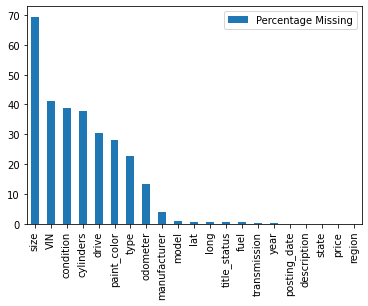

In [4]:
visualiseMissing(cars, detailed=True, graphical=True, rank=True)

In [5]:
visualiseStats(cars)
#Check if this is representative of entire dataset

Visualising Statistics


,price,year,odometer,lat,long
count,1.000000e+04,9976.000000,8.670000e+03,9934.000000,9934.000000
mean,1.656776e+04,2010.734162,8.989157e+04,35.154227,-101.269726
std,1.123174e+05,9.130011,7.759004e+04,6.414934,19.552511
min,0.000000e+00,1911.000000,0.000000e+00,-30.894121,-151.373963
25%,5.371250e+03,2008.000000,3.800000e+04,31.570000,-119.024987
50%,1.199500e+04,2013.000000,8.100000e+04,34.183005,-104.823110
75%,2.199500e+04,2016.000000,1.264692e+05,38.608933,-82.321830
max,1.111111e+07,2021.000000,3.330000e+06,64.878089,-70.893000


,pearson,pearson abs,kendall,kendall abs,spearman,spearman abs,Average Abs
year,0.024573,0.024573,0.368557,0.368557,0.489146,0.489146,0.294092
odometer,-0.031728,0.031728,-0.340500,0.340500,-0.474601,0.474601,0.282277
transmission,0.017481,0.017481,0.141475,0.141475,0.175977,0.175977,0.111645
cylinders,-0.004722,0.004722,0.085521,0.085521,0.112697,0.112697,0.067647
paint_color,-0.004993,0.004993,0.076498,0.076498,0.105947,0.105947,0.062480
description,0.011121,0.011121,0.067836,0.067836,0.089731,0.089731,0.056229
state,-0.013315,0.013315,-0.064919,0.064919,-0.087336,0.087336,0.055190
fuel,-0.012206,0.012206,-0.066606,0.066606,-0.083113,0.083113,0.053975
type,-0.004753,0.004753,0.056314,0.056314,0.078187,0.078187,0.046418
model,0.012094,0.012094,0.040585,0.040585,0.060022,0.060022,0.037567


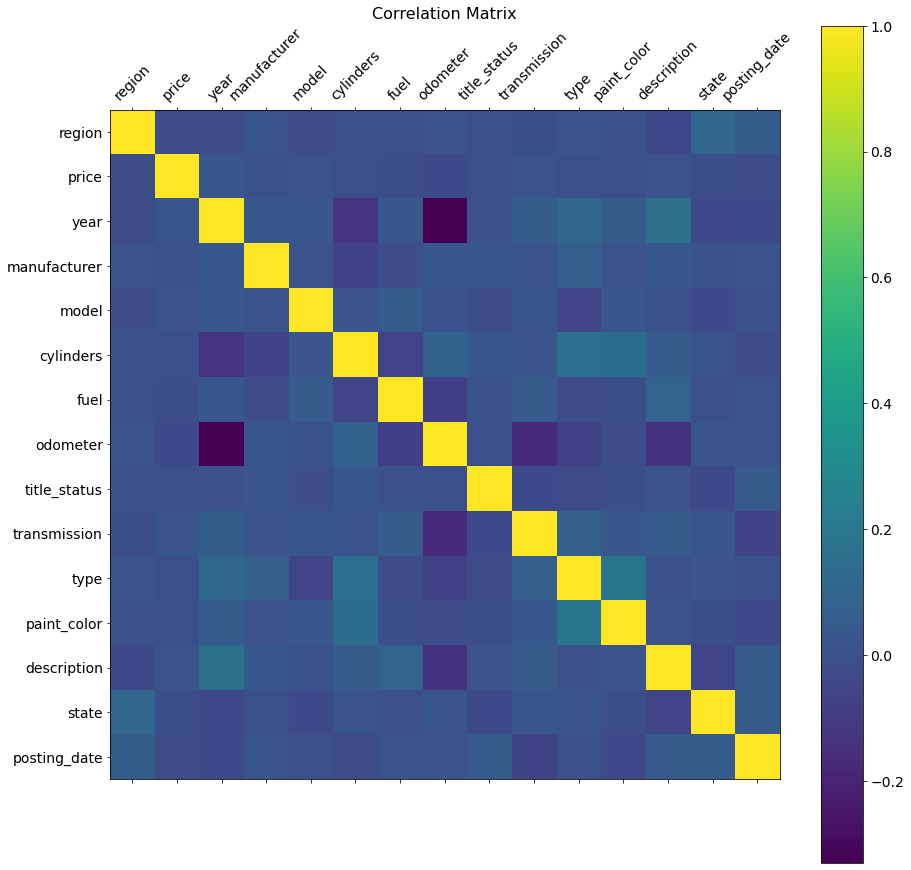

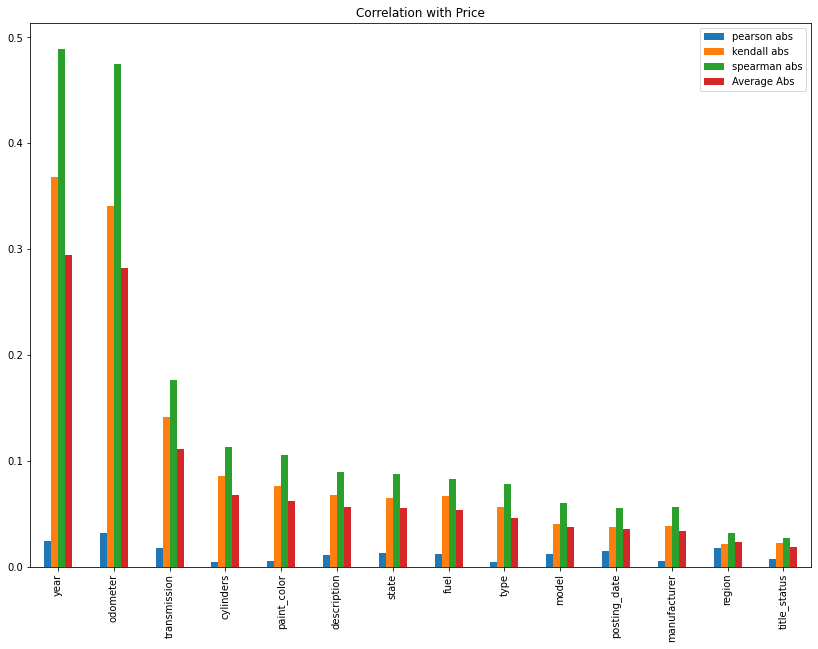

In [11]:
visualiseCorr(cars, numerical=False, categorical=True, detail=True, bar=True)

## Dealing with missing data

In [7]:
from sklearn.linear_model import LinearRegression

def removeRows(df, features):
    df = df.dropna(subset=features)
    return df

def removeFeatures(df, features):
    for feature in features:
        if feature in df.columns:
            df = df.drop(columns=feature)
    return df

def fillFromFeatureMode(df, targetFeature, sampleFeature):
    for i, entry in df[df[targetFeature].isna()].iterrows():
        sample = entry[sampleFeature]
        target = df[df[sampleFeature] == sample][targetFeature].mode()
        if target.empty:
            target = "NaN"
        else:
            target = target.values
        df.loc[i, targetFeature] = target
    return df

def predictFeature(df, subsetFeature, targetFeature, variableFeature):
    subsets = df[df[targetFeature].isna()][subsetFeature].unique()
    for subset in subsets:
        reg = LinearRegression()
        subsetVehicles = df[df[subsetFeature] == subset]
        trainVehicles = subsetVehicles[subsetVehicles[targetFeature].notna()]
        if len(trainVehicles) > 1:
            x = trainVehicles[variableFeature].values.reshape(-1, 1)
            y = trainVehicles[targetFeature].values.reshape(-1, 1)
            reg.fit(x, y)
            predictVehicles = subsetVehicles[subsetVehicles[targetFeature].isna()]
            predictions = reg.predict(predictVehicles[variableFeature].values.reshape(-1,1))
            j = 0
            for i, entry in predictVehicles.iterrows():
                df.at[i, targetFeature] = predictions[j]
                j += 1
    return df

In [13]:
print(cars['title_status'].unique())

#Remove rows if small percentage missing, and high importance features
cars = removeRows(cars, ['year', 'transmission', 'title_status', 'model', 'manufacturer', 'description'])
#Remove features with large amounts of missing data, that are of low importance
cars = removeFeatures(cars, ['lat', 'long', 'drive', 'size', 'VIN', 'condition'])

#Fill fuel from mode of the sample model
cars = fillFromFeatureMode(cars, 'fuel', 'model')

cars = predictFeature(cars, 'model', 'odometer', 'year')

cars = removeRows(cars, ['odometer'])

visualiseMissing(cars, detailed=True, graphical=False, rank=True)



['clean' 'rebuilt' 'salvage' 'lien' 'missing' 'parts only']
Visualing Missing Data
Number of Features =  15

Percentage Missing in Features: 


,Percentage Missing
cylinders,36.3938
paint_color,26.5589
type,20.2237
region,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0


## One Hot Encoding

['fl' 'ca' 'ct' 'ak' 'ga' 'al' 'dc' 'az' 'co' 'de' 'ar']


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,1,2,3,4,5,6,7,8,9,10
0,tampa bay area,21930,2018.0,honda,hr-v,NaN,4 cylinders,gas,15657.000000,clean,...,0,0,0,0,0,0,0,0,1,0
1,monterey bay,13981,2015.0,ford,escape,NaN,NaN,gas,73148.000000,clean,...,0,0,0,1,0,0,0,0,0,0
2,chico,11111111,2007.0,nissan,pathfinder,NaN,NaN,gas,150000.000000,clean,...,0,0,0,1,0,0,0,0,0,0
3,ocala,700,2015.0,chrysler,200,NaN,NaN,gas,82430.171548,clean,...,0,0,0,0,0,0,0,0,1,0
4,hartford,15800,2013.0,acura,mdx,NaN,NaN,gas,103266.000000,clean,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9024,huntsville / decatur,22989,2017.0,lincoln,mkz,NaN,4 cylinders,gas,23619.000000,clean,...,1,0,0,0,0,0,0,0,0,0
9025,atlanta,8998,2015.0,fiat,500,NaN,4 cylinders,gas,51833.000000,clean,...,0,0,0,0,0,0,0,0,0,1
9026,tampa bay area,13791,2017.0,chevrolet,volt,NaN,4 cylinders,other,44986.000000,clean,...,0,0,0,0,0,0,0,0,1,0
9027,ocala,55000,1968.0,chevrolet,camaro,excellent,8 cylinders,gas,11251.931967,clean,...,0,0,0,0,0,0,0,0,1,0


Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'type',
       'paint_color', 'description', 'state', 'posting_date'],
      dtype='object')


,pearson,pearson abs,kendall,kendall abs,spearman,spearman abs,Average Abs
year,0.024573,0.024573,0.368557,0.368557,0.489146,0.489146,0.294092
odometer,-0.031728,0.031728,-0.340500,0.340500,-0.474601,0.474601,0.282277
transmission,0.017481,0.017481,0.141475,0.141475,0.175977,0.175977,0.111645
cylinders,-0.004722,0.004722,0.085521,0.085521,0.112697,0.112697,0.067647
paint_color,-0.004993,0.004993,0.076498,0.076498,0.105947,0.105947,0.062480
description,0.011121,0.011121,0.067836,0.067836,0.089731,0.089731,0.056229
state,-0.013315,0.013315,-0.064919,0.064919,-0.087336,0.087336,0.055190
fuel,-0.012206,0.012206,-0.066606,0.066606,-0.083113,0.083113,0.053975
0,0.004433,0.004433,0.062260,0.062260,0.075998,0.075998,0.047564
type,-0.004753,0.004753,0.056314,0.056314,0.078187,0.078187,0.046418


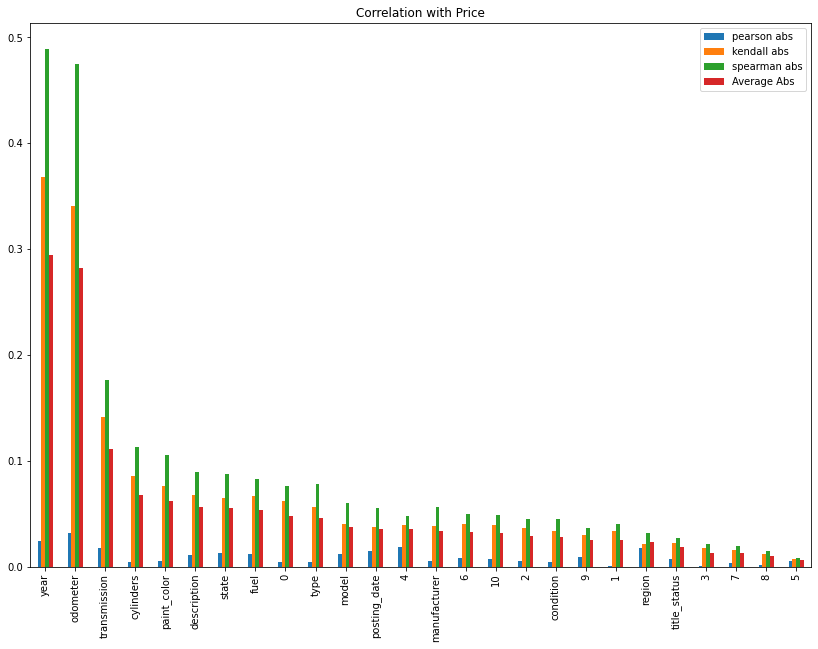

In [9]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder

print(cars['state'].unique())
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(cars['state'])
binarizer = LabelBinarizer()
ohEnc = OneHotEncoder()
transformed = binarizer.fit_transform(cars['state'])

ohe_df = pd.DataFrame(transformed)
cars = cars.reset_index(drop=True)
#cars_oh = pd.concat([cars, ohe_df], axis=0).drop(['state'], axis=1)
cars_ohe = pd.concat([cars, ohe_df], axis=1)
display(cars_ohe)
print(cars.columns)
#print(cars_oh.columns)

visualiseCorr(cars_ohe, numerical=False, categorical=False, detail=True, bar=True)